In [1]:
"""
Dataset Regresión Logística – Heart Disease Cleveland UCI:
https://www.kaggle.com/datasets/cherngs/heart-diseasecleveland-uci
Contiene información de pacientes como edad, sexo, presión
sanguínea, colesterol, etc. la variable objetivo es la presencia
de enfermedad cardíaca.
"""


'\nDataset Regresión Logística – Heart Disease Cleveland UCI:\nhttps://www.kaggle.com/datasets/cherngs/heart-diseasecleveland-uci\nContiene información de pacientes como edad, sexo, presión\nsanguínea, colesterol, etc. la variable objetivo es la presencia\nde enfermedad cardíaca.\n'

In [8]:
"""
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
"""
#importamos libreriras

import pandas as pd # manejo de analisis estrucuras de datos
import numpy as np # calculos numericos y analisis de datos
import seaborn as sns # crea graficas estadisticas
import matplotlib.pyplot as plt #crea graficas en dos dimensiones

# Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#leemos el dataset
Dataset = pd.read_csv("./heart_cleveland_upload.csv")
Dataset.describe()

,Edad,Sexo,cp,presion_arterial_reposo,colesterol,glucemia_ayunas,electrocardiograficos_reposo,frecuencia_cardiaca,exang,depresion_ST,slope,ca,thal,enfermedad
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
"""
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 
"""
#datos en 0
print("Cantidad de Registros con cero en Edad: ",Dataset['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en presion_arterial_reposo: ",Dataset['presion_arterial_reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en colesterol: ",Dataset['colesterol'].isin([0]).sum())
print("Cantidad de Registros con cero en frecuencia_cardiaca: ",Dataset['frecuencia_cardiaca'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en presion_arterial_reposo:  0
Cantidad de Registros con cero en colesterol:  0
Cantidad de Registros con cero en frecuencia_cardiaca:  0


Text(0.5, 1.0, 'Identificacion de Datos')

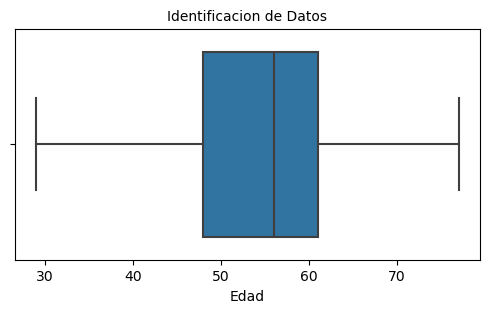

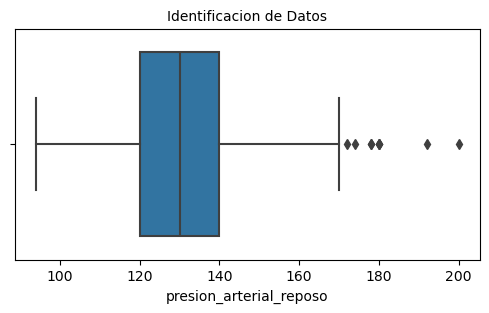

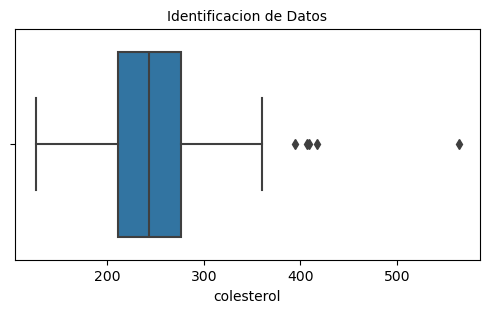

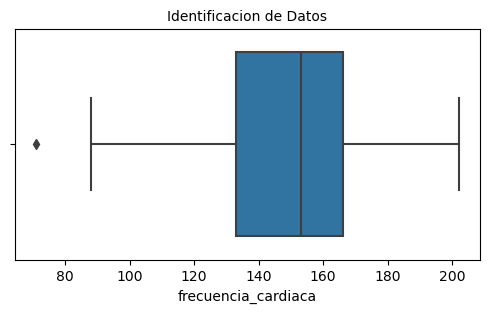

In [10]:
#revisar datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Edad'])
plt.title('Identificacion de Datos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['presion_arterial_reposo'])
plt.title('Identificacion de Datos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['colesterol'])
plt.title('Identificacion de Datos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['frecuencia_cardiaca'])
plt.title('Identificacion de Datos', fontsize=10)

In [11]:
nivel_minimo=40
nivel_maximo=160
Total_Atipicos=((Dataset['presion_arterial_reposo']<nivel_minimo) | (Dataset['presion_arterial_reposo']>nivel_maximo)).sum()
print("El total de datos atipicos de presion_arterial_reposo {}".format(Total_Atipicos))

nivel_minimo=0
nivel_maximo=400
Total_Atipicos=((Dataset['colesterol']<nivel_minimo) | (Dataset['presion_arterial_reposo']>nivel_maximo)).sum()
print("El total de datos atipicos de colesterol {}".format(Total_Atipicos))


nivel_minimo=0
nivel_maximo=180
Total_Atipicos=((Dataset['frecuencia_cardiaca']<nivel_minimo) | (Dataset['presion_arterial_reposo']>nivel_maximo)).sum()
print("El total de datos atipicos de frecuencia_cardiaca {}".format(Total_Atipicos))



El total de datos atipicos de presion_arterial_reposo 15
El total de datos atipicos de colesterol 0
El total de datos atipicos de frecuencia_cardiaca 2


In [12]:
#filtramos datos atipicos par cambiarlos.
nivel_minimo=40
nivel_maximo=160
Dataset=Dataset[(Dataset['presion_arterial_reposo']<nivel_maximo)&(Dataset['presion_arterial_reposo']>nivel_minimo)]


In [15]:
#verificamos los datos atipicos
nivel_minimo=40
nivel_maximo=160
Total_Atipicos=((Dataset['presion_arterial_reposo']<nivel_minimo) | (Dataset['presion_arterial_reposo']>nivel_maximo)).sum()
print("El total de datos atipicos de presion_arterial_reposo {}".format(Total_Atipicos))


El total de datos atipicos de presion_arterial_reposo 0


In [16]:
#filtramos datos atipicos par cambiarlos.
nivel_minimo=0
nivel_maximo=180
Dataset=Dataset[(Dataset['frecuencia_cardiaca']<nivel_maximo)&(Dataset['frecuencia_cardiaca']>nivel_minimo)]


In [17]:
nivel_minimo=0
nivel_maximo=180
Total_Atipicos=((Dataset['frecuencia_cardiaca']<nivel_minimo) | (Dataset['presion_arterial_reposo']>nivel_maximo)).sum()
print("El total de datos atipicos de frecuencia_cardiaca {}".format(Total_Atipicos))

El total de datos atipicos de frecuencia_cardiaca 0


In [18]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 296
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Edad                          252 non-null    int64  
 1   Sexo                          252 non-null    int64  
 2   cp                            252 non-null    int64  
 3   presion_arterial_reposo       252 non-null    int64  
 4   colesterol                    252 non-null    int64  
 5   glucemia_ayunas               252 non-null    int64  
 6   electrocardiograficos_reposo  252 non-null    int64  
 7   frecuencia_cardiaca           252 non-null    int64  
 8   exang                         252 non-null    int64  
 9   depresion_ST                  252 non-null    float64
 10  slope                         252 non-null    int64  
 11  ca                            252 non-null    int64  
 12  thal                          252 non-null    int64  
 13  enfermedad

In [20]:
"""
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
"""
#total de personas con problemas cardiacos
Dataset["enfermedad"].value_counts()



enfermedad
0    134
1    118
Name: count, dtype: int64

In [22]:
"""
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
"""
#porcetaje de train 75%, porcentaje test 25%
X = Dataset.drop("enfermedad",axis=1) # Se cargan Los datos de train sin los datos de la columna enfermedad
Y = Dataset["enfermedad"] # Se cargan los datos de train con Los datos de La columna enfermedad

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [25]:
print(X_train)

     Edad  Sexo  cp  presion_arterial_reposo  colesterol  glucemia_ayunas  \
279    44     1   3                      120         169                0   
281    44     1   3                      110         197                0   
119    51     1   2                      125         245                1   
213    58     1   3                      114         318                0   
83     65     0   2                      140         417                1   
..    ...   ...  ..                      ...         ...              ...   
141    44     1   2                      120         226                0   
264    50     1   3                      144         200                0   
127    50     1   2                      129         196                0   
191    62     0   3                      124         209                0   
50     49     0   1                      134         271                0   

     electrocardiograficos_reposo  frecuencia_cardiaca  exang  depresion_ST

In [24]:
print(Y_train)

279    1
281    1
119    0
213    1
83     0
      ..
141    0
264    1
127    0
191    0
50     0
Name: enfermedad, Length: 189, dtype: int64


In [30]:
"""
5. Entrenar el modelo configurando los diferentes hiperparámetros
"""

modelo_regresion = LogisticRegression(solver = "liblinear") # Liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # La funcion predict predice los valores a partir del conjunto de datos de validación

In [27]:
print(Y_train)

279    1
281    1
119    0
213    1
83     0
      ..
141    0
264    1
127    0
191    0
50     0
Name: enfermedad, Length: 189, dtype: int64


In [31]:
print(Prediccion)

[1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0]


In [32]:
"""
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
"""
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        34
           1       0.85      0.76      0.80        29

    accuracy                           0.83        63
   macro avg       0.83      0.82      0.82        63
weighted avg       0.83      0.83      0.82        63



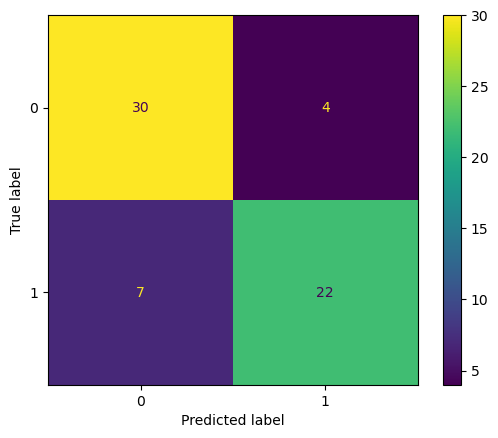

In [33]:
"""
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
"""
#matrix de confusion
cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

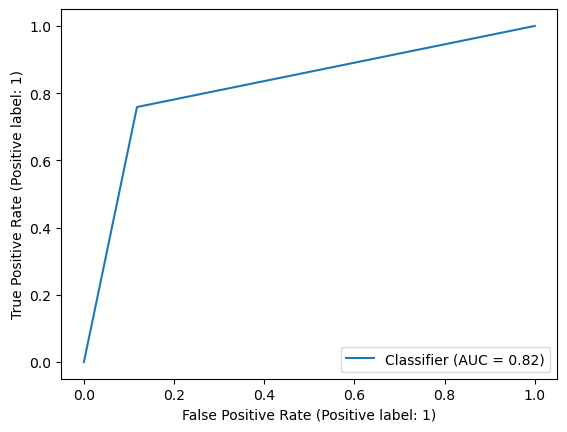

In [34]:
#curva de presicion
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()